In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving Amazon_Cell_Phones.csv to Amazon_Cell_Phones.csv


In [18]:
df = pd.read_csv('Amazon_Cell_Phones.csv')

In [20]:
df.head()

,ID,product_name,product_link,image_link,Price (Dollar),discount_percentage,price_before_discount,rating_out_of_5,number_of_ratings,brand,operating_system,RAM (GB),CPU,Storage (GB),screen_size (Inches),cellular_technology,model_name,cpu_model,available_colors
0,1,"Apple iPhone XR, 64GB, Black - Unlocked (Renewed)",https://www.amazon.com/Apple-iPhone-XR-Fully-U...,https://m.media-amazon.com/images/I/717KHGCJ6e...,168.39,5.93,179.0,4.4,64918.0,Apple,iOS 12,3.0,NaN,64.0,6.10,"LTE, CDMA, EV-DO, UMTS, HSPA, HSDPA, GSM, EDGE",iPhone XR,NaN,"Black, Blue, Coral, Red, White, Yellow"
1,2,"Apple iPhone 11, 64GB, Black - Unlocked (Renewed)",https://www.amazon.com/Apple-iPhone-11-64GB-Bl...,https://m.media-amazon.com/images/I/612kg3rGyY...,230.00,0.00,NaN,4.2,52613.0,Apple,iOS 16,4.0,NaN,64.0,6.10,4G,iPhone 11,NaN,"Black, Green, Purple, Red, White, Yellow"
2,3,"Apple iPhone 12, 64GB, Black - Fully Unlocked ...",https://www.amazon.com/Apple-iPhone-12-64GB-Bl...,https://m.media-amazon.com/images/I/41bIlvE1rd...,287.00,0.00,NaN,4.1,25403.0,Apple,iOS 16,4.0,NaN,64.0,6.10,"5G, 4G LTE",iPhone 12,NaN,"(Product)Red, Black, Blue, Green, Purple, Red,..."
3,4,"OnePlus Nord CE 2,​ 5G Unlocked Android Smartp...",https://www.amazon.com/OnePlus-Unlocked-Androi...,https://m.media-amazon.com/images/I/61+Q6Rh3OQ...,329.99,0.00,NaN,4.3,25133.0,OnePlus,Android 12.0,8.0,NaN,128.0,6.43,5G,Nord CE 2,Others,NaN
4,5,"Apple iPhone XS, US Version, 64GB, Space Gray ...",https://www.amazon.com/Apple-iPhone-64GB-Space...,https://m.media-amazon.com/images/I/51I7GPdU6L...,182.00,0.00,NaN,4.2,21859.0,Apple,iOS 12,NaN,NaN,64.0,5.80,"GSM, CDMA, HSPA, EVDO, LTE, HSDPA",iPhone XS,NaN,"GOLD, Gold, SILVER, Silver, Space Gray"


The data is uploaded now we have to check if the data is cleaned or not

In [23]:
#Identify missing values in the dataset

missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Price (Dollar)           1004
price_before_discount    2782
rating_out_of_5           234
number_of_ratings         234
brand                       4
operating_system          404
RAM (GB)                 1457
CPU                      2129
Storage (GB)               95
screen_size (Inches)      188
cellular_technology       541
model_name                166
cpu_model                2775
available_colors         2064
dtype: int64


In [26]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: Index(['ID', 'Price (Dollar)', 'discount_percentage', 'price_before_discount',
       'rating_out_of_5', 'number_of_ratings', 'RAM (GB)', 'Storage (GB)',
       'screen_size (Inches)'],
      dtype='object')
Categorical Columns: Index(['product_name', 'product_link', 'image_link', 'brand',
       'operating_system', 'CPU', 'cellular_technology', 'model_name',
       'cpu_model', 'available_colors'],
      dtype='object')


In [27]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


In [28]:
df[categorical_cols] = df[categorical_cols].fillna("Unknown")


In [32]:
df = df.drop_duplicates()

In [33]:
df.isnull().sum()

,0
ID,0
product_name,0
product_link,0
image_link,0
Price (Dollar),0
discount_percentage,0
price_before_discount,0
rating_out_of_5,0
number_of_ratings,0
brand,0


In [34]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3351 non-null   int64  
 1   product_name           3351 non-null   object 
 2   product_link           3351 non-null   object 
 3   image_link             3351 non-null   object 
 4   Price (Dollar)         3351 non-null   float64
 5   discount_percentage    3351 non-null   float64
 6   price_before_discount  3351 non-null   float64
 7   rating_out_of_5        3351 non-null   float64
 8   number_of_ratings      3351 non-null   float64
 9   brand                  3351 non-null   object 
 10  operating_system       3351 non-null   object 
 11  RAM (GB)               3351 non-null   float64
 12  CPU                    3351 non-null   object 
 13  Storage (GB)           3351 non-null   float64
 14  screen_size (Inches)   3351 non-null   float64
 15  cell

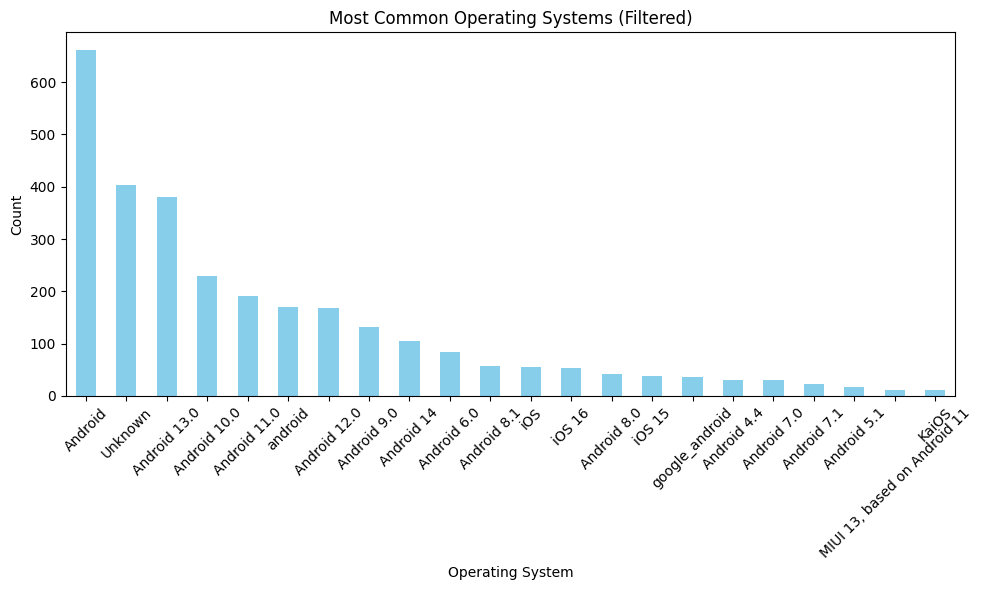

In [48]:
# Most common Operating system
os_filtered = os_counts[os_counts > 10]

# Plot filtered operating systems
os_filtered.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Most Common Operating Systems (Filtered)")
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Pricing Trends**

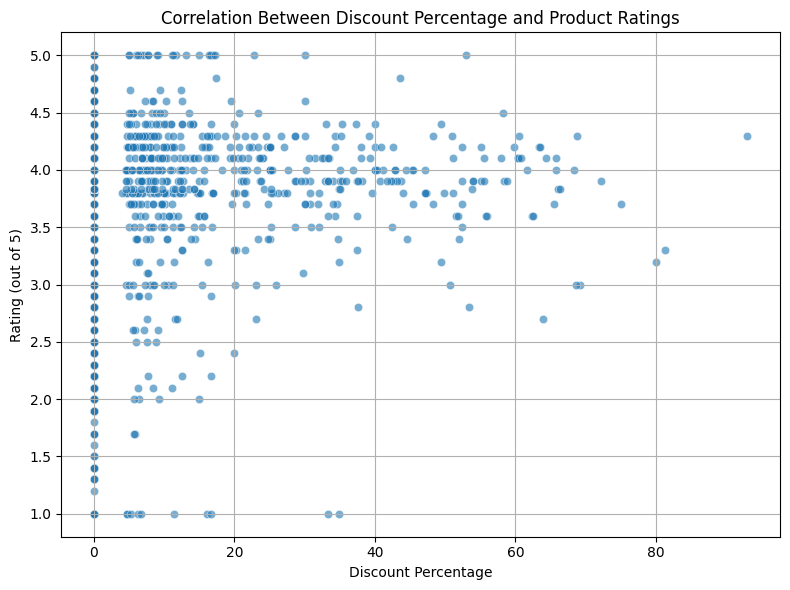

In [46]:
#Correlation between discount percentage and product ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='discount_percentage', y='rating_out_of_5', data=df, alpha=0.6)
plt.title("Correlation Between Discount Percentage and Product Ratings")
plt.xlabel("Discount Percentage")
plt.ylabel("Rating (out of 5)")
plt.grid(True)
plt.tight_layout()
plt.show()

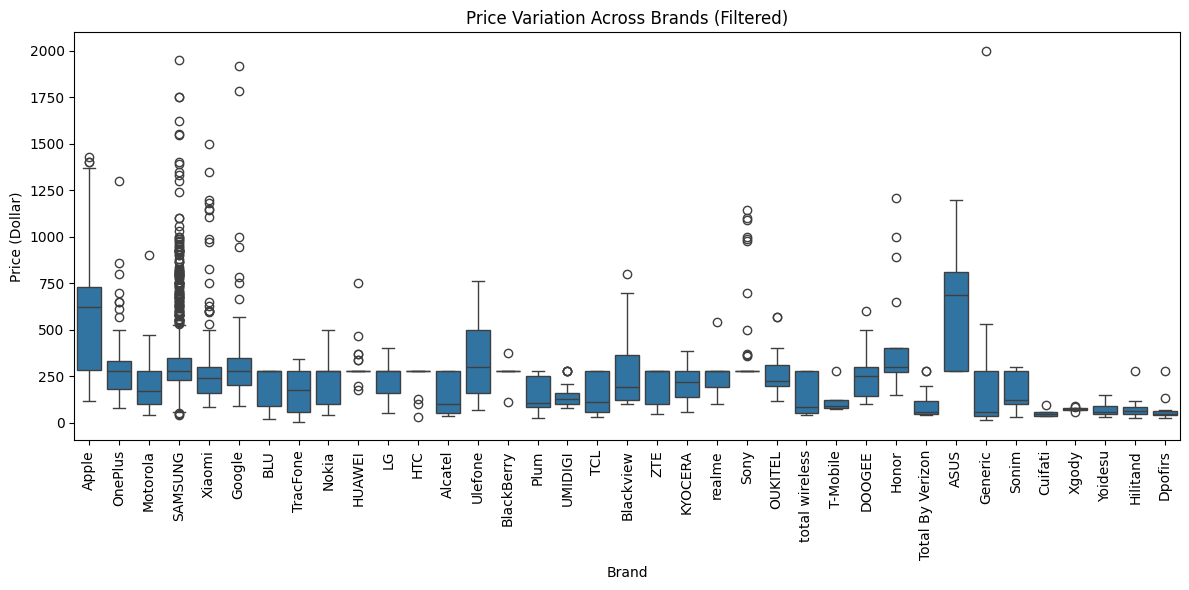

In [49]:
# Pricing Trends: Variation in prices across different brands
# Filter brands with more than 10 products
brand_counts = df['brand'].value_counts()
filtered_brands = brand_counts[brand_counts > 10].index
filtered_data = df[df['brand'].isin(filtered_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='Price (Dollar)', data=filtered_data)
plt.xticks(rotation=90)
plt.title("Price Variation Across Brands (Filtered)")
plt.xlabel("Brand")
plt.ylabel("Price (Dollar)")
plt.tight_layout()
plt.show()


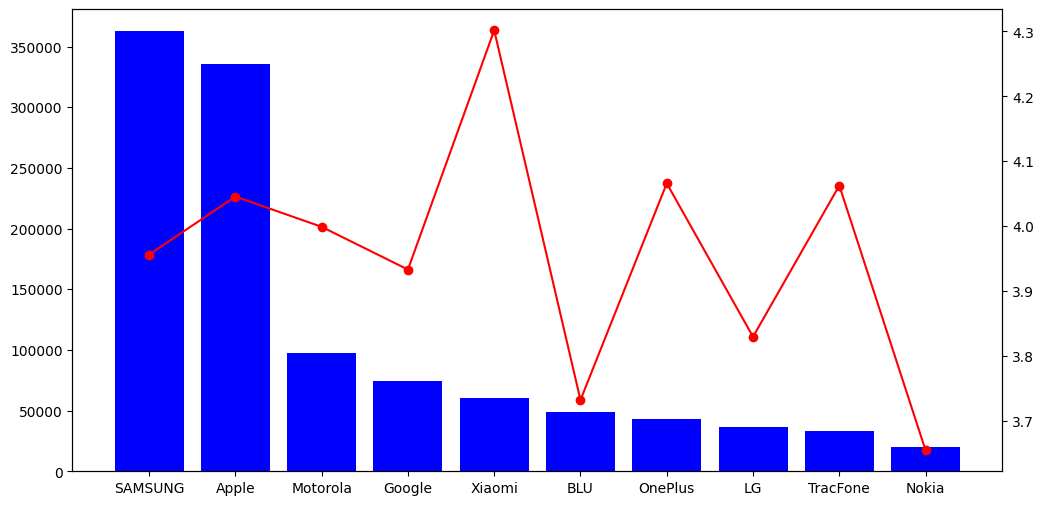

In [52]:
# Top brands based on average rating and number of ratings
top_brands = df.groupby('brand').agg(
    avg_rating=('rating_out_of_5', 'mean'),
    total_ratings=('number_of_ratings', 'sum')
).sort_values(by='total_ratings', ascending=False).head(10)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.bar(top_brands.index, top_brands['total_ratings'], color='blue')
ax2.plot(top_brands.index, top_brands['avg_rating'], color='red', marker='o')

# **Specifications Analysis**

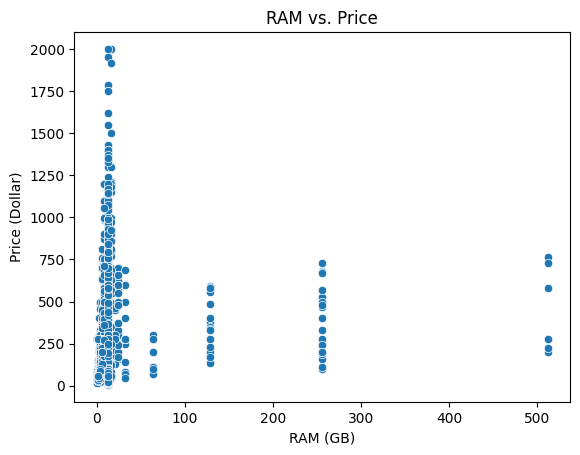

In [55]:
#Analyze whether phones with higher RAM are priced significantly higher
sns.scatterplot(x='RAM (GB)', y='Price (Dollar)', data=df)
plt.title("RAM vs. Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Dollar)")
plt.show()

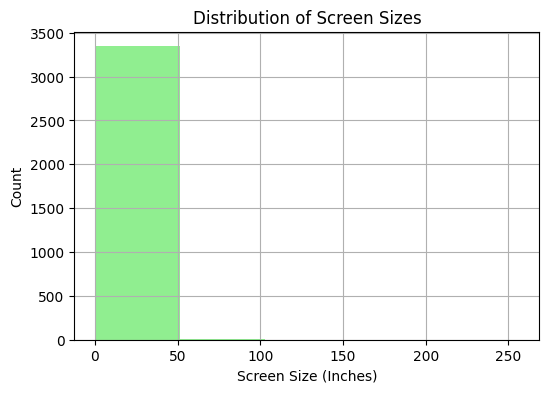

In [61]:
#Screen Size Distribution:
#Identifing the most common screen sizes.

df['screen_size (Inches)'].hist(bins=5, color='lightgreen', figsize=(6, 4))
plt.title("Distribution of Screen Sizes")
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Count")
plt.show()

# **Rating Analysis** Examine factors affecting product ratings.

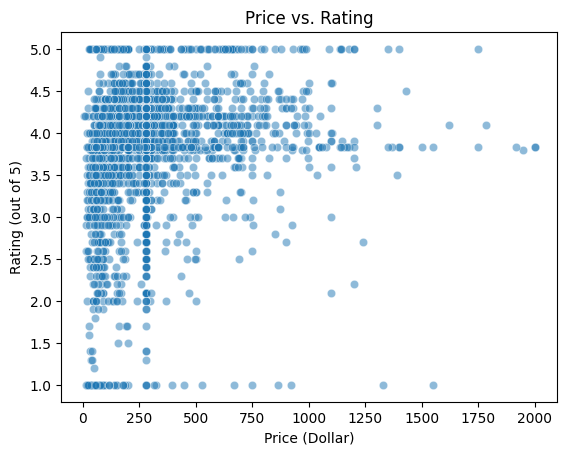

In [63]:
#Price vs. Rating:
#Check if higher-priced products tend to receive better ratings.

sns.scatterplot(x='Price (Dollar)', y='rating_out_of_5', data=df, alpha=0.5)
plt.title("Price vs. Rating")
plt.xlabel("Price (Dollar)")
plt.ylabel("Rating (out of 5)")
plt.show()

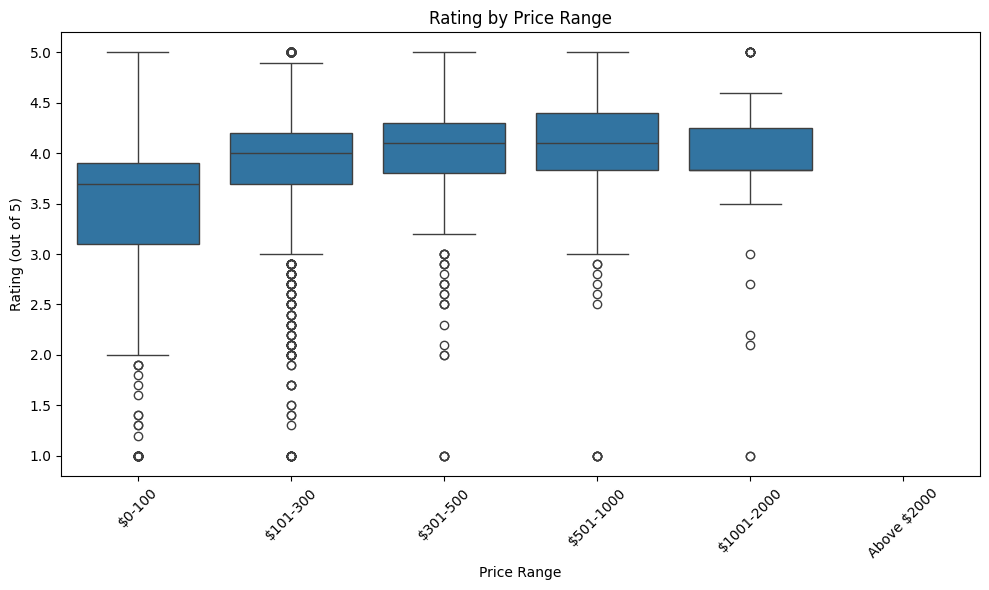

In [66]:
# Define price bins
bins = [0, 100, 300, 500, 1000, 2000, float('inf')]
labels = ['$0-100', '$101-300', '$301-500', '$501-1000', '$1001-2000', 'Above $2000']
df['Price Range'] = pd.cut(df['Price (Dollar)'], bins=bins, labels=labels, right=False)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price Range', y='rating_out_of_5', data=df)
plt.title("Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Rating (out of 5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


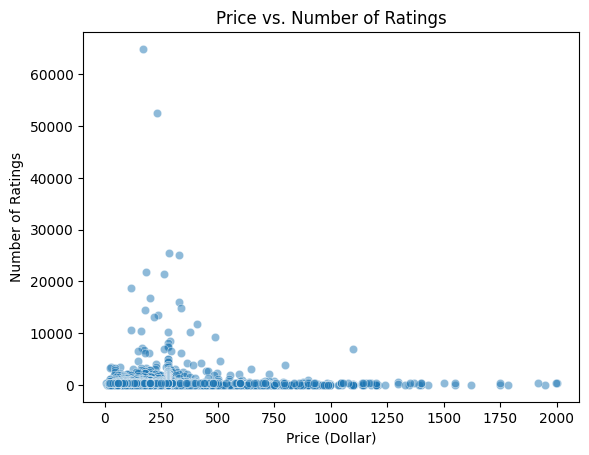

In [67]:
#Number of Ratings vs. Price:
#See if more expensive phones receive fewer ratings.

sns.scatterplot(x='Price (Dollar)', y='number_of_ratings', data=df, alpha=0.5)
plt.title("Price vs. Number of Ratings")
plt.xlabel("Price (Dollar)")
plt.ylabel("Number of Ratings")
plt.show()


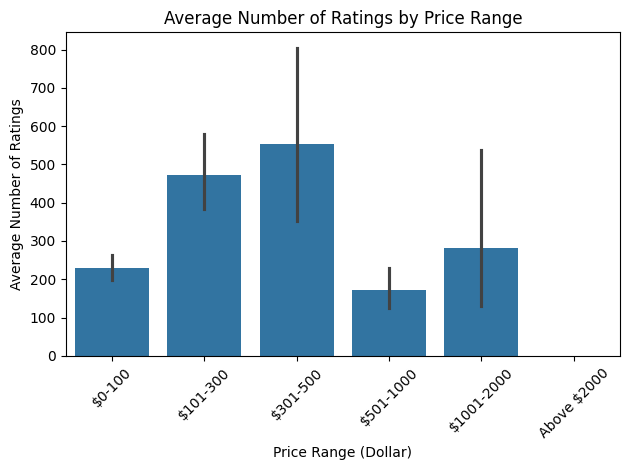

In [69]:
#Number of Ratings vs. Price:
#See if more expensive phones receive fewer ratings.
# Barplot for average number of ratings by price range

sns.barplot(x='Price Range', y='number_of_ratings', data=df, estimator='mean')
plt.title("Average Number of Ratings by Price Range")
plt.xlabel("Price Range (Dollar)")
plt.ylabel("Average Number of Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Popularity Analysis**

**Determine which brands and models are most popular**

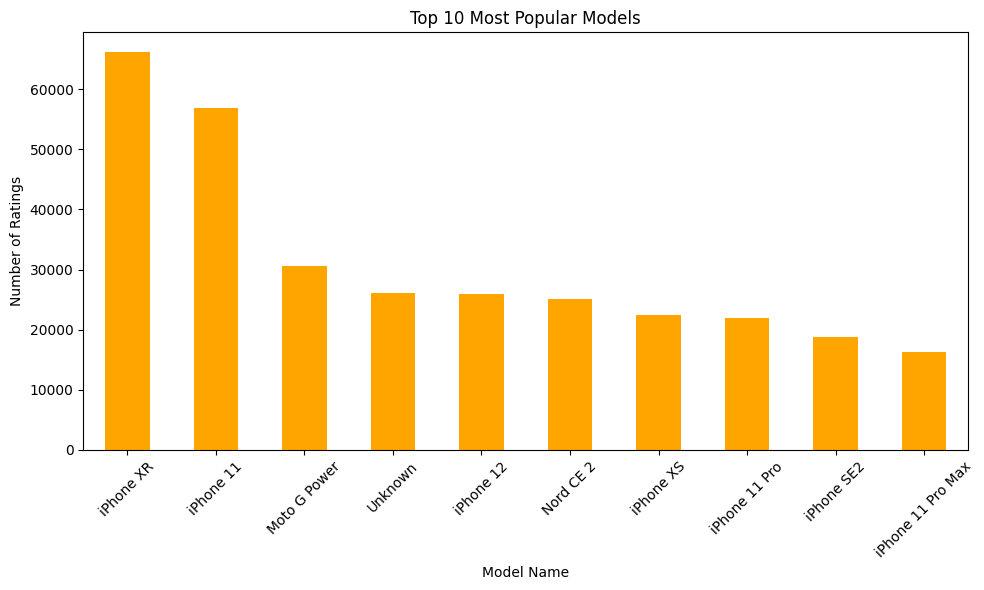

In [70]:
#Most Popular Models:
#Find models with the highest number of ratings

top_models = df.groupby('model_name')['number_of_ratings'].sum().sort_values(ascending=False).head(10)
top_models.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Top 10 Most Popular Models")
plt.xlabel("Model Name")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


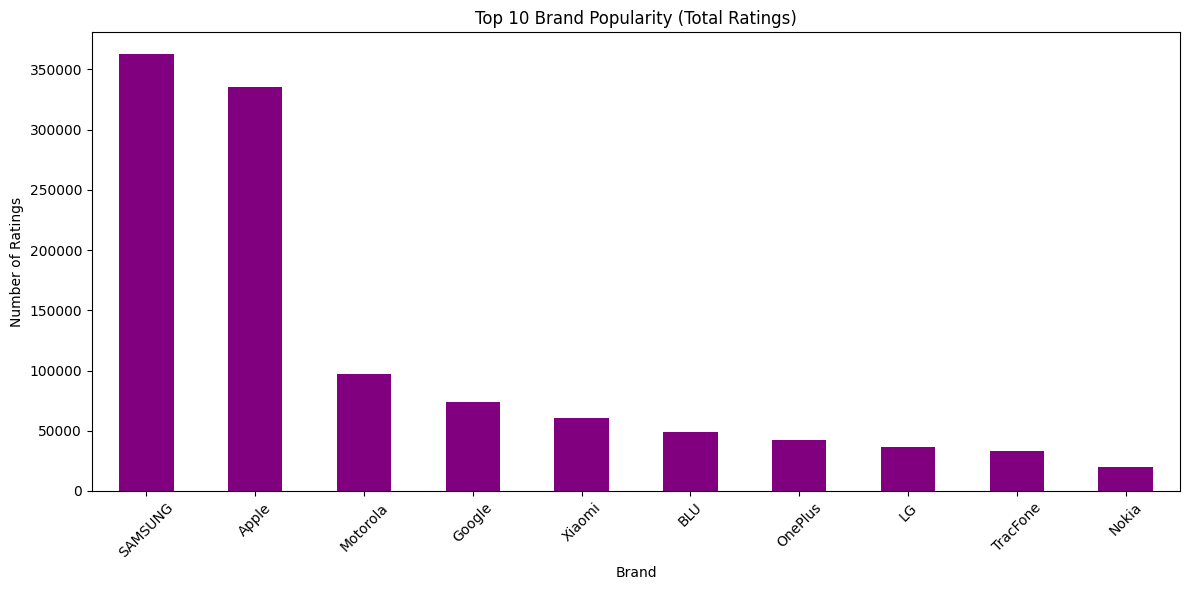

In [74]:
# Brand vs. Popularity
# Compare the popularity of different brands by aggregating the number of ratings.

brand_popularity.plot(kind='barh', color='purple', figsize=(12, 6))  # Horizontal bar chart
plt.title("Brand Popularity (Total Ratings)")
plt.xlabel("Number of Ratings")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

# **Discount Analysis**

In [ ]:
#Discount vs. Price Reduction:
#Measure how much price reduction is achieved with increasing discount percentages

**Studying the impact of discounts on product prices and ratings.**

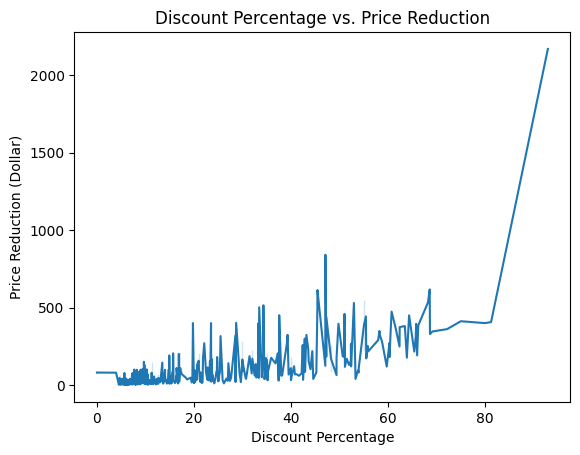

In [81]:


# Sort the data by discount_percentage for a smoother line
df_sorted = df.sort_values(by='discount_percentage')

# Line plot to show the trend
sns.lineplot(x='discount_percentage', y='price_reduction', data=df_sorted)
plt.title("Discount Percentage vs. Price Reduction")
plt.xlabel("Discount Percentage")
plt.ylabel("Price Reduction (Dollar)")
plt.show()



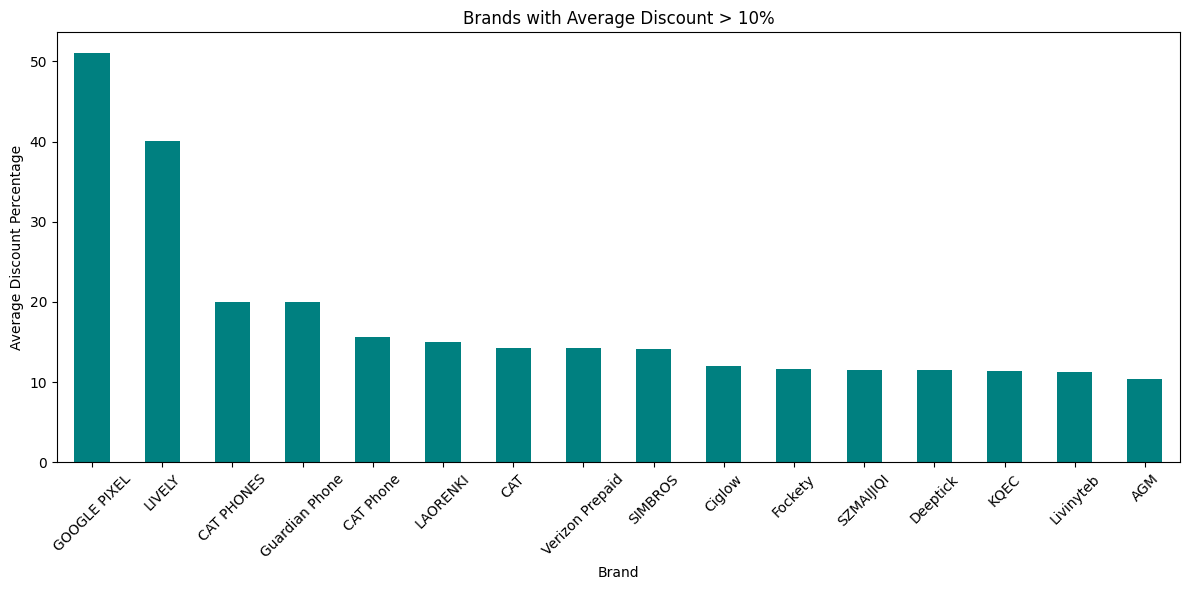

In [85]:
#Discount by Brand:
#Identify which brands offer the highest average discounts

# Filter brands with discount percentage greater than a specific threshold (e.g., > 10%)
filtered_avg_discount = avg_discount_by_brand[avg_discount_by_brand > 10]

# Plot the filtered brands with high discount percentages
filtered_avg_discount.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title("Brands with Average Discount > 10%")
plt.xlabel("Brand")
plt.ylabel("Average Discount Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





# **Operating System Trends**

**Examine the popularity and pricing of different operating systems**

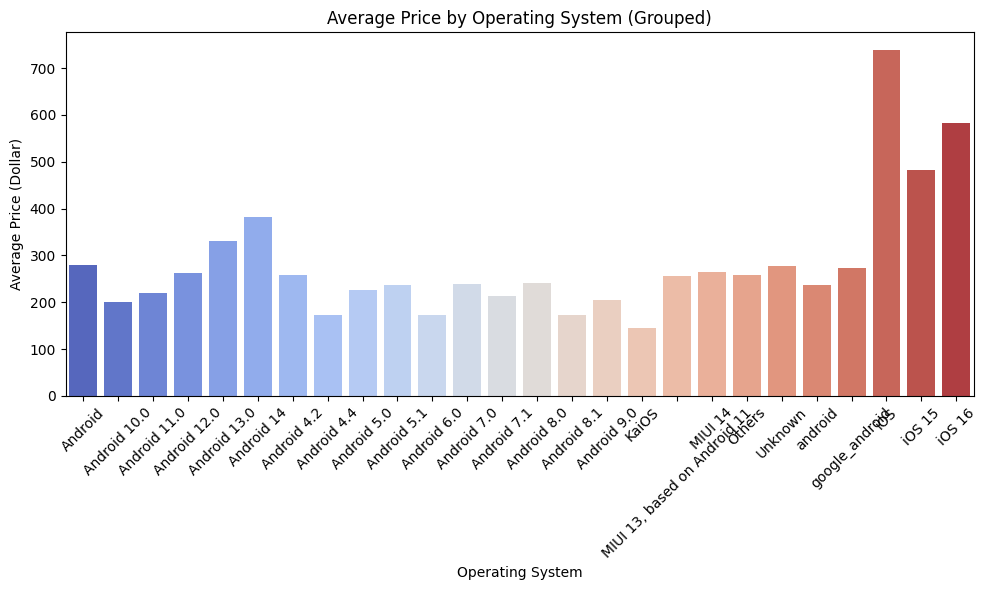

In [93]:

# Set a threshold for grouping rare operating systems
threshold = 10  # Minimum number of occurrences to keep as a separate category
os_counts = df['operating_system'].value_counts()

# Replace rare operating systems with "Others"
df['operating_system_grouped'] = df['operating_system'].apply(lambda x: x if os_counts[x] >= threshold else 'Others')

# Recalculate average price for grouped operating systems
avg_price_by_os_grouped = df.groupby('operating_system_grouped')['Price (Dollar)'].mean().reset_index()

# Bar plot for grouped operating systems
plt.figure(figsize=(10, 6))
sns.barplot(x='operating_system_grouped', y='Price (Dollar)', data=avg_price_by_os_grouped, palette='coolwarm')

plt.title("Average Price by Operating System (Grouped)")
plt.xlabel("Operating System")
plt.ylabel("Average Price (Dollar)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



